Reference : https://github.com/atulpatelDS/Youtube/blob/main/Feature_Engineering/Feature%20Selection%20using%20ANOVA%20Test%20for%20Classification%20and%20Regression%20-%20Tutorial%204.ipynb

**Feature Selection for Regression Problem using ANOVA(Analysis of Variance) or F-Test**
- A univariate test,Linear model for testing the individual effect of each of features with target.
- ANOVA assumes a linear relationship between the features and the target, and also that the variables are normally distributed.
- It’s well-suited for continuous variables and requires a binary target, but sklearn extends it to regression problems, also.

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

def MAE(y_true,y_pred):
    return round(mean_absolute_error(y_true,y_pred),2)

In [5]:
num = 400
target = 'y2'
df_fulldata = pd.read_csv("./src/generated_data.csv").drop(columns = ['trend_data','season_data','noise_data','actual','y','y1','actual_y1','actual_y2'])
df_train = df_fulldata.loc[0:df_fulldata.shape[0]-num-1]
df_test = df_fulldata.loc[df_fulldata.shape[0]-num:]

X_train = df_train.drop(columns=target)
y_train = df_train[target]
X_test = df_test.drop(columns=target)
y_test = df_test[target]

X_train.shape,X_test.shape

((1059, 84), (400, 84))

In [3]:
scaler = StandardScaler()
pca = PCA(n_components=0.95)
mm = MinMaxScaler()

X_mm_train = mm.fit_transform(X_train)
X_mm_test = mm.transform(X_test)

y_mm_train = mm.fit_transform(y_train.to_numpy().reshape(-1,1))
y_mm_test = mm.transform(y_test.to_numpy().reshape(-1,1))

X_pca_train = pca.fit_transform(scaler.fit_transform(X_train))
X_pca_test = pca.transform(scaler.transform(X_test))

df_pca_train = pd.DataFrame(X_pca_train)
df_pca_test = pd.DataFrame(X_pca_test)

In [4]:
base_model = LinearRegression().fit(X_train, y_train)
# Returning the R^2 for the model
base_model_r2 = base_model.score(X_train, y_train)
y_pred = base_model.predict(X_train)
print(f'R^2: {base_model_r2:4f}')
print(f"MAE train : {MAE(y_pred, y_train)}")

base_model_r2 = base_model.score(X_test, y_test)
y_pred = base_model.predict(X_test)
print(f'R^2: {base_model_r2:4f}')
print(f"MAE test : {MAE(y_pred, y_test)}")

R^2: 0.877497
MAE train : 8.41
R^2: 0.479804
MAE test : 8.77


# ANOVA

> Lets perform Feature selection using Anova or F-Test Linear Regression sklearn 

f_regression()
Univariate linear regression tests.

Linear model for testing the individual effect of each of many regressors.
This is a scoring function to be used in a feature selection procedure, not
a free standing feature selection procedure.

This is done in 2 steps:

1. The correlation between each regressor and the target is computed,
   that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) *
   std(y)).
2. It is converted to an F score then to a p-value.

In [48]:
from sklearn.feature_selection import f_regression, SelectKBest

# apply SelectKBest class to extract top 30 best features
fs = SelectKBest(score_func=f_regression, k=25)
# Apply feature selection
fs.fit(X_train,y_train)
# DataFrame
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))
features = pd.DataFrame(X_train.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)

In [49]:
# Assign the column name
feature_score.columns = ["Input_Features","F_Score","P_Value"]
feature_ls = feature_score.nlargest(25,columns="F_Score")['Input_Features'].values
feature_ls

array(['ma_6', 'sum_7', 'ma_8', 'ma_10', 'ma_4', 'ma_12', 'ma_14',
       'sum_14', 'max_14', 'max_7', 'ma_2', 'max_30', 'sum_30', 'ma_30',
       'sum_365', 'ma_365', 'sum_180', 'ma_180', 'max_365', 'max_180',
       'ma_60', 'sum_60', 'lag_0', 'lag_1', 'lag_180'], dtype=object)

In [50]:
ANOVA_model = LinearRegression().fit(X_train[feature_ls], y_train)
# Returning the R^2 for the model
ANOVA_model_r2 = ANOVA_model.score(X_train[feature_ls], y_train)
y_pred = ANOVA_model.predict(X_train[feature_ls])
print(f'R^2: {ANOVA_model_r2:4f}')
print(f"MAE train : {MAE(y_pred, y_train)}")

ANOVA_model_r2 = ANOVA_model.score(X_test[feature_ls], y_test)
y_pred = ANOVA_model.predict(X_test[feature_ls])
print(f'R^2: {ANOVA_model_r2:4f}')
print(f"MAE test : {MAE(y_pred, y_test)}")

R^2: 0.872522
MAE train : 8.68
R^2: 0.488234
MAE test : 8.67


# Check Assumption

Fitting linear regression

R^2: 0.8741388389832272 

Coefficients
-------------------------------------
Intercept: 13.895253470113104
X1: 0.013892704843488396
X2: 0.017730767360235537
X3: 0.002788727032966303
X4: 0.007826235052822582
X5: 0.03151283592233695
X6: 0.5481126074222445
X7: -0.0025539947055903964
X8: -0.03575592587776052
X9: 0.1699412058991486
X10: 0.024106139835495876
X11: 0.053424560987059486
X12: 0.07042171858152478
X13: 0.001391953326142334
X14: 4.639844421072943e-05
X15: 0.0028187666525225663
X16: 7.722648395445394e-06
X17: -0.0039891279611630765
X18: -2.2161821949816075e-05
X19: 3.3231810417668894
X20: -3.2431008007832727
X21: -4.4055997292555996e-05
X22: -0.002643359838103067
X23: 0.05321181804680698
X24: 0.05363730392737938
X25: 0.14675674480745848
X26: 0.0948158373306475
X27: 0.01858209786269579
X28: -0.14416359871870094
X29: 0.0006201238525265579
X30: -0.010230935164938256
X31: -0.03246417946362731
X32: 0.059743770301785154
X33: 0.004579048903174785
X34: -0.06562546

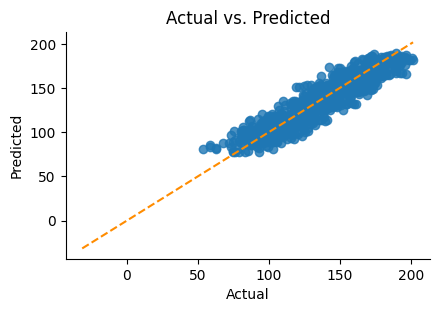

>>> Assumption 2: The error terms are normally distributed
Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.31271575168280924
Residuals are normally distributed


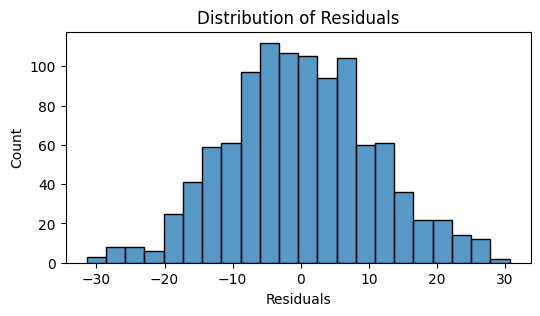

Assumption satisfied

>>> Assumption 3: Little to no multicollinearity among predictors


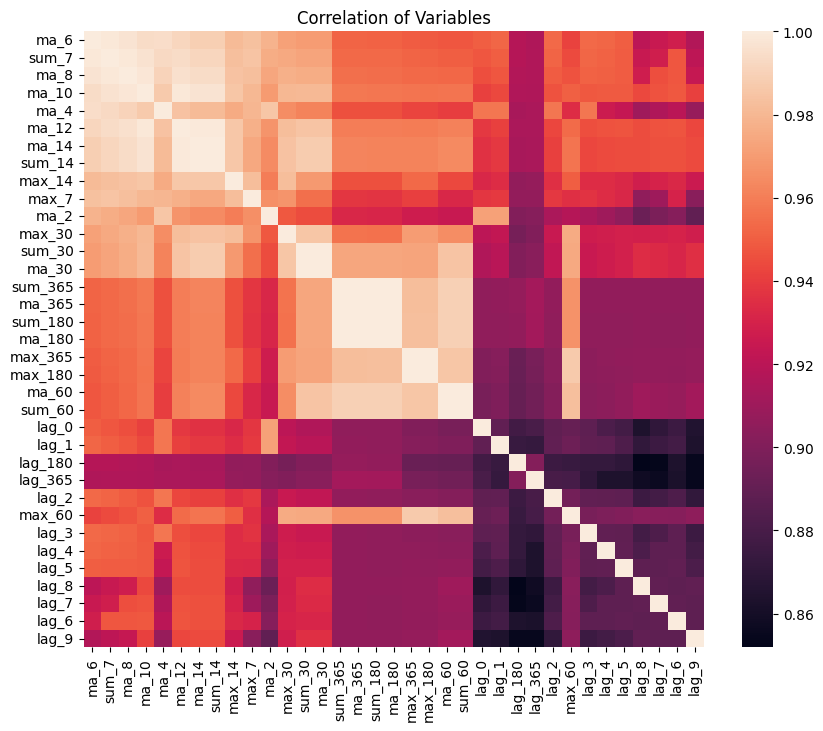

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------


/Users/rootbeam/opt/miniconda3/envs/gpu/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


ma_6: inf
sum_7: inf
ma_8: inf
ma_10: inf
ma_4: inf
ma_12: 27014.914865425635
ma_14: inf
sum_14: inf
max_14: 2241.6485004510723
max_7: 1361.0420315309675
ma_2: inf
max_30: 2939.7023767818555
sum_30: inf
ma_30: inf
sum_365: inf
ma_365: inf
sum_180: inf
ma_180: inf
max_365: 2049299.9866329515
max_180: 2041888.4275158104
ma_60: inf
sum_60: inf
lag_0: inf
lag_1: inf
lag_180: 128.44927198249917
lag_365: 100.28759641947127
lag_2: inf
max_60: 3245.228623653242
lag_3: inf
lag_4: inf
lag_5: inf
lag_8: inf
lag_7: inf
lag_6: inf
lag_9: inf

35 cases of possible multicollinearity
35 cases of definite multicollinearity

*** Assumption not satisfied ***
Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

>>> Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
------

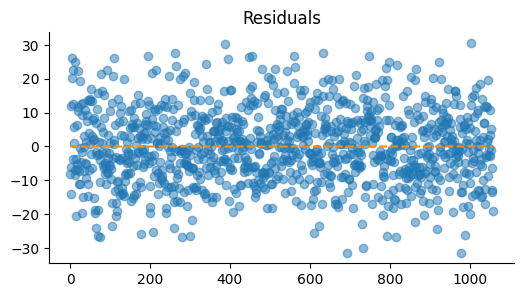

In [47]:
from utils.linear_assumptions import linear_regression_assumptions
linear_regression_assumptions(X_train[feature_ls], y_train)